In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [22]:
N = 6
max_demos = 1
possible_rewards = np.linspace(0, 1, N)

In [23]:
metrics = {}
metrics["true_evds"] = {num_demos + 1: 0 for num_demos in range(max_demos)}
metrics["pmfs"] = {num_demos + 1: 0 for num_demos in range(max_demos)}
metrics["learned_policies"] = {num_demos + 1: 0 for num_demos in range(max_demos)}
metrics["comparison_grids"] = {num_demos + 1: 0 for num_demos in range(max_demos)}

with open("./debugging.txt") as file:
    lines = file.readlines()
    for line in lines:
        if line.startswith("Environment"):
            curr_metric = "lava_loc"
        elif line.startswith("True reward function"):
            curr_metric = "true_reward"
        elif line.strip() == "True optimal policy":
            curr_metric = "top"
        elif line.startswith("Num demos"):
            curr_demos = float(re.search("Num demos ([.\d]+)", line).group(1))
        elif line.strip() == "EVDs":
            curr_metric = "true_evds"
        elif line.strip() == "PMFs":
            curr_metric = "pmfs"
        elif line.strip() == "Learned policies":
            curr_metric = "learned_policies"
        elif line.strip() == "Comparison grid":
            curr_metric = "comparison_grids"
        elif line.strip().startswith(("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "[", "(")):
            if curr_metric == "lava_loc":
                lava_loc = eval(line.strip())
            elif curr_metric == "true_reward":
                true_reward = eval(line.strip())
            elif curr_metric == "top":
                true_pi = eval(line.strip())
                true_pi_x = [tp[0] for tp in true_pi]
                true_pi_y = [tp[1] for tp in true_pi]
            else:
                metrics[curr_metric][curr_demos] = eval(line.strip())

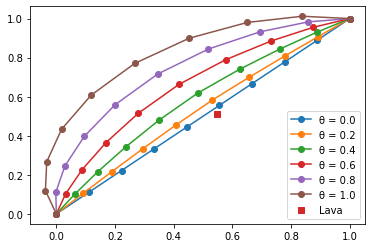

In [24]:
### Debugging policies

possible_policies = [
    [[0.0, 0.0], [0.1111111111111111, 0.1111111111111111], [0.2222222222222222, 0.2222222222222222], [0.3333333333333333, 0.3333333333333333], [0.4444444444444444, 0.4444444444444444], [0.5555555555555556, 0.5555555555555556], [0.6666666666666666, 0.6666666666666666], [0.7777777777777777, 0.7777777777777777], [0.8888888888888888, 0.8888888888888888], [1.0, 1.0]],
    [[0.0, 0.0], [0.0907347265537556, 0.10475051230830741], [0.1889042313641294, 0.21597160293983977], [0.2947487746274911, 0.33342470004706254], [0.40878445512550515, 0.45656031968975347], [0.5320213772846929, 0.5831987125829464], [0.6575210199802148, 0.6999150353604964], [0.7779385083426854, 0.8077731867047135], [0.8922391516910989, 0.907634714937915], [1.0, 1.0]],
    [[0.0, 0.0], [0.06329104725227894, 0.10189374614658428], [0.1419021066093922, 0.2167478621292393], [0.2367358232586527, 0.3432822421427749], [0.3492736000715578, 0.4791888677456004], [0.481526180063776, 0.6181750528005444], [0.6243275755501506, 0.7402775134090325], [0.7608720197316218, 0.8433034608291575], [0.8867947176779258, 0.9294076390824004], [1.0, 1.0]],
    [[0.0, 0.0], [0.032324606668809694, 0.10413612735729035], [0.0881424850313567, 0.22698370460889258], [0.16949107339934302, 0.36557088791665965], [0.27896438545774427, 0.5148155266523704], [0.4184550740720412, 0.6635616603445391], [0.5771534587647079, 0.7894811591304668], [0.7328337399769267, 0.885795601505659], [0.8753237561758223, 0.9551332228907479], [1.0, 1.0]],
    [[0.0, 0.0], [-0.0016189008676757387, 0.11077446978891048], [0.02907879264000743, 0.24499666162842887], [0.09541702694480661, 0.397373949593699], [0.20059333689709086, 0.5594614751236309], [0.34537567827367077, 0.7160254702746675], [0.5182927978162561, 0.8441303195361333], [0.6948791384522476, 0.9324827462587022], [0.8584598072372412, 0.9830308387642103], [1.0, 1.0]],
    [[0.0, 0.0], [-0.03714081030094599, 0.11973146101020543], [-0.03269815040972511, 0.26703350345571036], [0.01805603837274742, 0.4337019547960835], [0.11839922328352927, 0.6076272963453642], [0.26738773850279257, 0.770718660712012], [0.4529637565784952, 0.8995353591863184], [0.6506597653572872, 0.980151659707909], [0.8380336937527416, 1.011925405594347], [1.0, 1.0]]]

for i in range(len(possible_rewards)):
    pp = possible_policies[i]
    ppx = [ppi[0] for ppi in pp]
    ppy = [ppi[1] for ppi in pp]
    plt.plot(ppx, ppy, "-o", label = "θ = {}".format(round(possible_rewards[i], 1)))
plt.scatter(lava_loc[0], lava_loc[1], color = "#D62728", marker = "s", label = "Lava")
plt.legend()
plt.show()

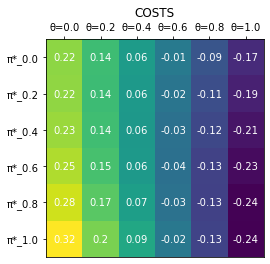

In [25]:
### Debugging values

fig, ax = plt.subplots(1, 1)
possible_rewards = np.linspace(0, 1, N)

comparison_grid = metrics["comparison_grids"][1]
ax.imshow(comparison_grid)
ax.set_xticks(np.arange(len(possible_rewards)))
ax.set_xticklabels(["θ={}".format(round(pr, 2)) for pr in possible_rewards])
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_yticks(np.arange(len(possible_rewards)))
ax.set_yticklabels(["π*_{}".format(round(pr, 2)) for pr in possible_rewards])
for j in range(len(possible_rewards)):
    for k in range(len(possible_rewards)):
        text = ax.text(k, j, round(comparison_grid[j][k], 2), ha="center", va="center", color="w")
plt.title("COSTS")
plt.show()